# Google Trends Data: Resampling and Visualising Time Series
# Introduction

In this project, we explore how the popularity of certain search terms on Google relates to real> world phenomena, such as financial markets and economic indicators. Google Trends provides a rich source of data on the search interest over time for specific terms, which we can compare with other time> series data sources.

We will investigate:

>  How the search volume for "Bitcoin" correlates with Bitcoin's price.
>  How search interest in "Tesla" relates to Tesla's stock price.
>  How search frequency for "Unemployment Benefits" varies with the official U.S. unemployment rate.

During this analysis, we will learn to:

>  Make time> series data comparable by resampling them to the same periodicity (e.g., monthly).
>  Customize Matplotlib charts for clarity and aesthetics.
>  Use grids to uncover seasonality in data.
>  Detect and handle missing values in time series.
>  Better style date axes using locators for improved readability.
>  Reinforce previous concepts by applying them to these real> world datasets.

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC> USD/history?p=BTC> USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')
df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration >  Making Sense of Google Search Data

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f> string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

### Tesla

In [13]:
print(f"Shape of Tesla: {df_tesla.shape}")

Shape of Tesla: (124, 3)


In [18]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [4]:
# lets preview the data
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


**Periodicity**: Monthly data.

In [11]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [14]:
# `.describe()` method
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [19]:
# Lets check the columns
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [15]:
print(f"Shape of Unemployment: {df_unemployment.shape}")

Shape of Unemployment: (181, 3)


In [16]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


**Periodicity**: Monthly data from 2004 onward.

In [17]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [20]:
df_unemployment[df_unemployment.UE_BENEFITS_WEB_SEARCH == 100]

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
61,2009-02,100,8.3


In [21]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin
With the Bitcoin data we see that we have two different .csv files. One of them has the day> by> day closing price and the trade volume of Bitcoin across 2204 rows. The other has the monthly search volume from Google Trends.

In [22]:
df_btc_price.shape

(2204, 3)

In [23]:
df_btc_price.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [24]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


we can see that frequency of data is daily.\
**Periodicity**: Daily data

In [29]:
print(f'largest BTC closing price: {df_btc_price.CLOSE.max()}')

largest BTC closing price: 19497.400391


In [27]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


**Periodicity**: Monthly data

In [28]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [30]:
print(f'largest BTC news: {df_btc_price.CLOSE.max()}')

largest BTC news: 19497.400391


> > > 

## What Do Google Trends Values Mean?

Google Trends search numbers represent **relative search popularity**, not absolute search counts. Each value is scaled from 0 to 100, with 100 being the peak popularity for the term in the chosen region and timeframe.

>  **100**: Peak popularity in the series.
>  **50**: Half as popular as the peak.
>  **0**: Not enough data for that time.

The relative value lets us see **trends and spikes in interest**, but not absolute volumes.

### Data Sources:
>  "Tesla", Worldwide, Web Search
>  "Bitcoin", Worldwide, News Search
>  "Unemployment Benefits", United States, Web Search

This understanding will guide our analysis as we connect search behavior with real> world price and economic data.


# Data Cleaning >  Resampling Time Series Data
Before analyzing or visualizing our time series data, it's essential to check for and address any missing or junk values in each DataFrame. Clean data will ensure our analysis is reliable and prevents errors during computation.

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

#### Steps for Data Cleaning

**1. Detecting Missing Values:**  
Use the `.isna()` method to find missing values in each DataFrame, followed by chaining `.values.any()` to check if any value is missing in the entire DataFrame.

In [34]:
print(f"Missing values for Tesla?: {df_tesla.isna().values.any()}")
print(f"Missing values for Unemployment?: {df_unemployment.isna().values.any()}")
print(f"Missing values for BTC Search?: {df_btc_search.isna().values.any()}")
print(f"Missing values for BTC Price?: {df_btc_price.isna().values.any()}")

Missing values for Tesla?: False
Missing values for Unemployment?: False
Missing values for BTC Search?: False
Missing values for BTC Price?: True


**2. Quantifying and Locating Missing Values:**  
To see how many missing values exist, chain `.isna().sum()` for each DataFrame. For Bitcoin price data, if missing values are found, check which rows are affected:

In [33]:
print(f'Missing values for Tesla?: \n{df_tesla.isna().sum()}')
print(f'Missing values for U/E?: \n{df_unemployment.isna().sum()}')
print(f'Missing values for BTC Search?: \n{df_btc_search.isna().sum()}')
print(f'Missing values for BTC price?: \n{df_btc_price.isna().sum()}')

Missing values for Tesla?: 
MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64
Missing values for U/E?: 
MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64
Missing values for BTC Search?: 
MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64
Missing values for BTC price?: 
DATE      0
CLOSE     1
VOLUME    1
dtype: int64


**To find the row where the missing values occur, we can create a subset of the DataFrame using .isna() once again**

In [37]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


In [38]:
df_btc_price[df_btc_price.CLOSE.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**3. Removing Missing Values:**  
Use `.dropna(inplace=True)` to eliminate any rows with missing data from the DataFrame:

In [39]:
df_btc_price.dropna(inplace=True)

In [40]:
# Lets verify
df_btc_search.isna().values.any()

np.False_

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [60]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

In [62]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

**👆 You can see now its a datetime datatype**

### Converting from Daily to Monthly Data (Resampling Time Series Data)

To compare time series on the same level, the data needs compatible frequencies. Here, the Bitcoin price data is daily, but the related Google Trends search data is monthly. This mismatch can be fixed by "resampling" the daily price data to monthly frequency.

>  Resampling takes the daily data and groups it by a new time frequency, you can find a list of different options [here](https://pandas.pydata.org/pandas> docs/stable/reference/api/pandas.DataFrame.resample.html) (for example `'M'` for monthly, 'Y' for yearly or 'T' for minute)..
>  For financial data like closing prices, it's common to use the **last price of the month** (using `.last()`). Alternatively, you could calculate a monthly average with `.mean()`.
>  To convert our daily data into monthly data, we're going to use the [.resample()](https://pandas.pydata.org/pandas> docs/stable/reference/api/pandas.DataFrame.resample.html) function. 

After resampling, the monthly price data will have the same number of periods as the monthly search data, making them directly comparable.

#### Converting Daily data to monthly
As we checked earlier that `df_btc_price` has frequency of daily
let's convert it to the monthly by taking last date of data of each month (we can also take the average)
```python
df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()
```

In [71]:
# In our case, we want the last available price of the month - the price at month-end.
df_btc_monthly = df_btc_price.resample('ME', on='DATE').last()
df_btc_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


>👆 Notice that Date column is monthly 

In [72]:
df_btc_monthly.shape

(73, 2)

# Data Visualisation
## Tesla Stock Price v.s. Search Volume
Let's create a basic line chart of the Tesla stock price and the search popularity and then gradually add more and more styling to our chart.
>  Try using one of the blue [colour names](https://matplotlib.org/stable/gallery/color/named_colors.html) for the search volume and a [HEX code](https://htmlcolorcodes.com/color-picker/) for a magenta colour for the stock price.

Hint: you can colour both the [axis labels](https://matplotlib.org/stable/api/text_api.html) and the [lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html) on the chart using keyword arguments (kwargs).

Text(0, 0.5, 'Tesla stock price')

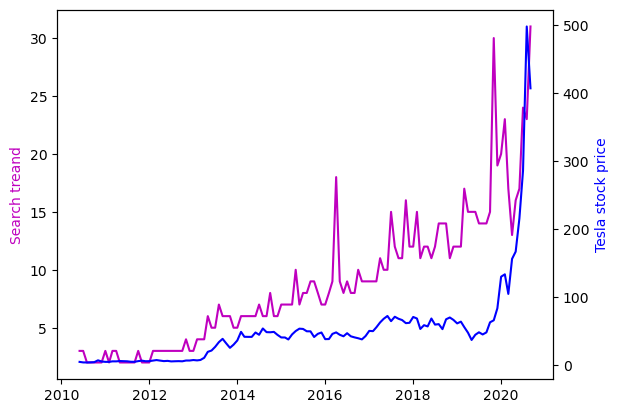

In [82]:
ax1 = plt.gca()

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='m')
ax1.set_ylabel("Search treand", color='m')
ax2 = ax1.twinx()

ax2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='b')
ax2.set_ylabel("Tesla stock price", color='b')

### Enhancing Time Series Visualizations: Tesla Web Search vs Price

Well-styled charts make time> series trends easier to interpret and more visually appealing. Here are the steps taken to enhance the Tesla Search vs Price chart:

1. Increase Chart Size and Resolution - `.figure(figsize=(14, 8), dpi=120)` to make the chart larger and sharper, ensuring readability on higher> resolution screens.
2. Improve Font and Label Sizes - `fontsize=14` for both axis labels and tick marks.
3. Rotate X Axis Labels - `plt.xticks(rotation=45)` for better spacing and visibility.
4. Add Descriptive Title - Use `plt.title()`.
5. Thicker Lines for Clarity - Increase the `linewidth` in both `plot()` calls (e.g., `linewidth=3`) to make the curves stand out.
6. Explicitly Control Axes Ranges - Use [set_xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html) and `set_ylim()` to focus on the data range, either with fixed values or by referencing the min/max of the dataset.
7. High Quality Output - Utilize the [DPI](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) setting for improved sharpness, especially for presentations and print.
8. Always Use [plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) - Explicitly call `plt.show()` to ensure the figure is rendered below the cell, promoting notebook clarity.
9. Address Matplotlib Warnings on Date Axes
>  If prompted by a warning, follow the Matplotlib suggestion to set the datetime converter explicitly. This avoids warning messages on the timeline’s axis.

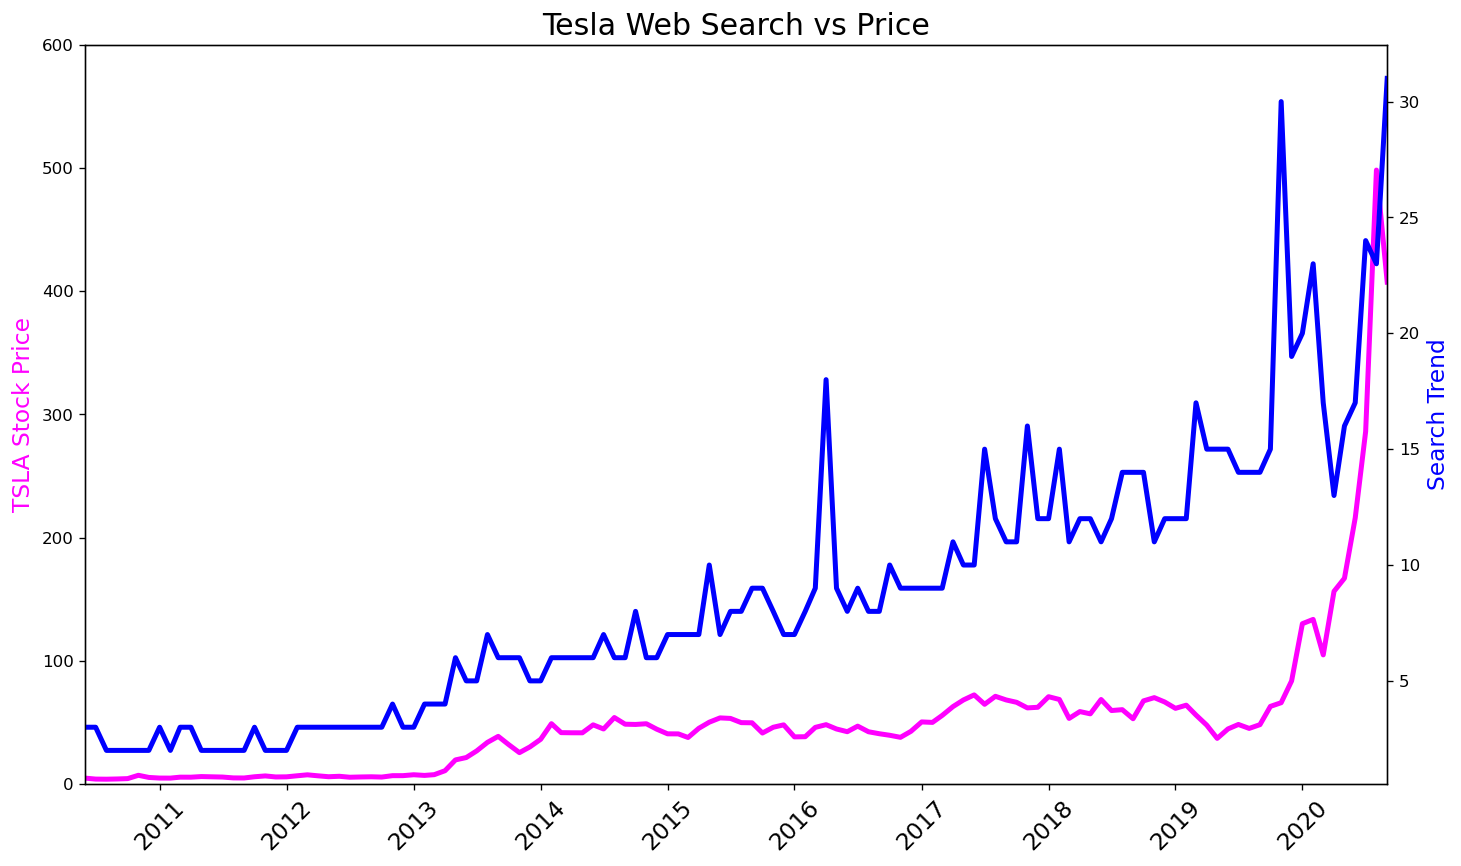

In [89]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price', color='#FF00FF', fontsize=14)   
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF00FF', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='blue', linewidth=3)
 
plt.show()

### Notebook Formatting & Style Helpers

In [90]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Using Locators and DateFormatters to Generate Tick Marks on a Time Line

When working with time series plots, it can be challenging to get the tick marks on the x-axis to display exactly how you want them. This is where **Locator** helpers in Matplotlib come in handy.

- Adding Locator Tick Marks

With Locators, we can change the x-axis ticks from looking cluttered or irregular to something more organized and informative.

#### Step 1: Import Date Handling Tools
All the date-related plotting functionality lives in the `matplotlib.dates` module. We first import the necessary classes from there:

In [91]:
import matplotlib.dates as mdates

#### Step 2: Create Locator Objects
We prepare two locators:

- `YearLocator()` to mark major ticks at every year.
- `MonthLocator()` to mark minor ticks at certain months.

We also create a `DateFormatter()` object to control how the dates appear as labels.

In [92]:
years = mdates.YearLocator()       # Major ticks every year
months = mdates.MonthLocator()     # Minor ticks every month
years_fmt = mdates.DateFormatter('%Y')  # Format major ticks as four-digit years

#### Step 3: Apply Locators and Formatters to the Plot
Using the axes object `ax1` from our chart, we set the major and minor tick placements and the format for the major tick labels:
```python
ax1.xaxis.set_major_locator(years)          # Set major ticks to years
ax1.xaxis.set_major_formatter(years_fmt)    # Format major ticks as years (e.g., 2023)
ax1.xaxis.set_minor_locator(months)          # Set minor ticks to months
```

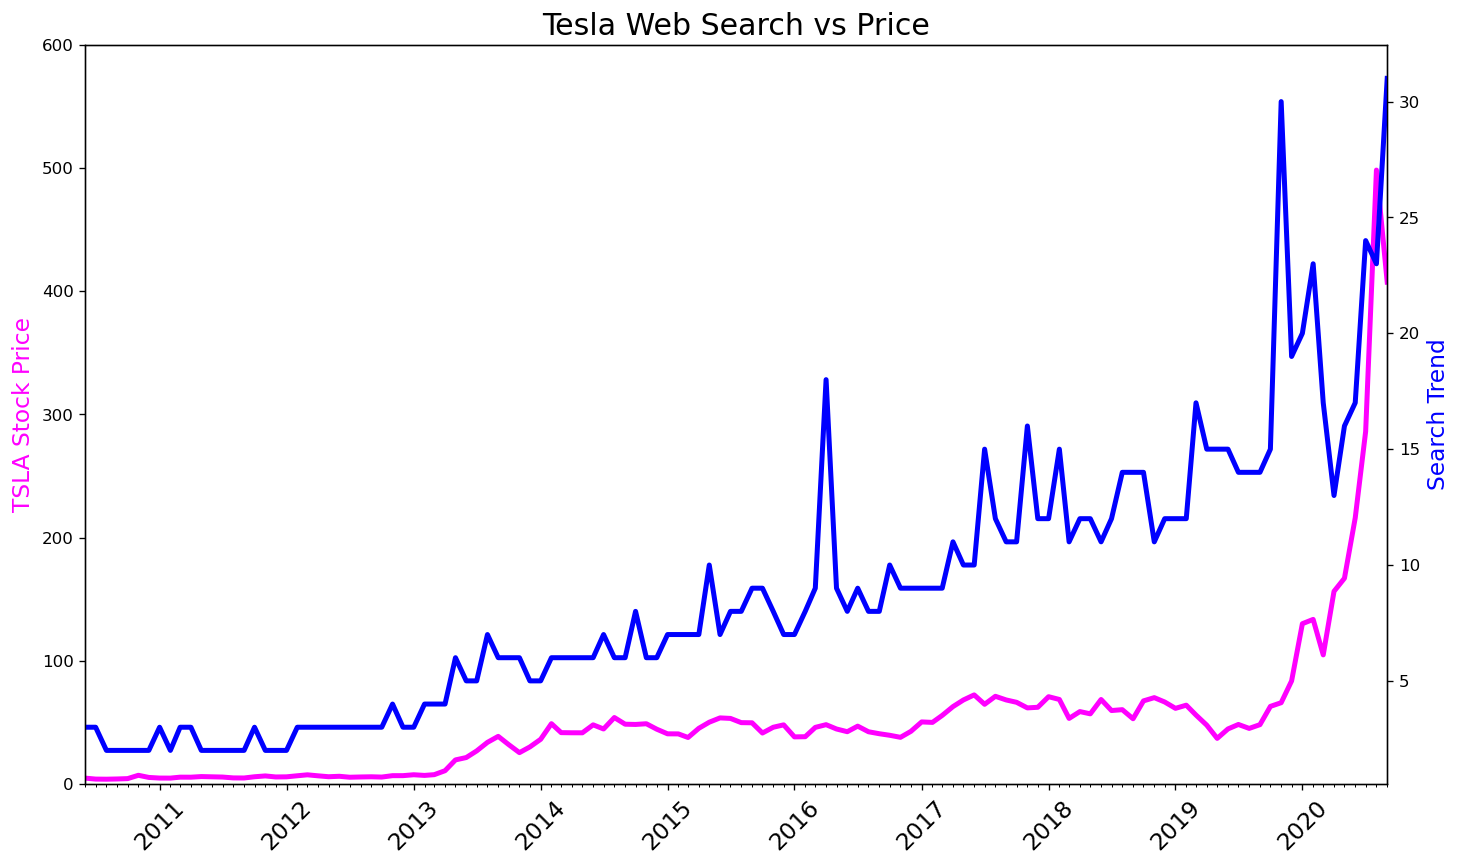

In [98]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price', color='#FF00FF', fontsize=14)   
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF00FF', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='blue', linewidth=3)
ax1.xaxis.set_major_locator(years)          # Set major ticks to years
ax1.xaxis.set_major_formatter(years_fmt)    # Format major ticks as years (e.g., 2023)
ax1.xaxis.set_minor_locator(months)          # Set minor ticks to months
plt.show()

##### Result

The x-axis now shows clean yearly major ticks labeled by the year, along with minor ticks marking months in between.

This improved timeline lets us visually associate data spikes with specific dates. For example, one can identify the spike in search interest around March 2016, corresponding to Tesla Model 3's unveiling. Similarly, the recent spikes align more with Tesla’s soaring stock price rather than new car releases.

>This technique enhances time-series charts by making the timeline clearer and more meaningful.

---

## Bitcoin (BTC) Price v.s. Search Volume
Now that the Tesla chart is stylized nicely, let's create a comparable chart for Bitcoin by modifying our previous chart code. This will help us explore how Bitcoin's news search interest relates to its resampled price.

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y> axis label to 'BTC Price' <br>
3. Change the y>  and x> axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

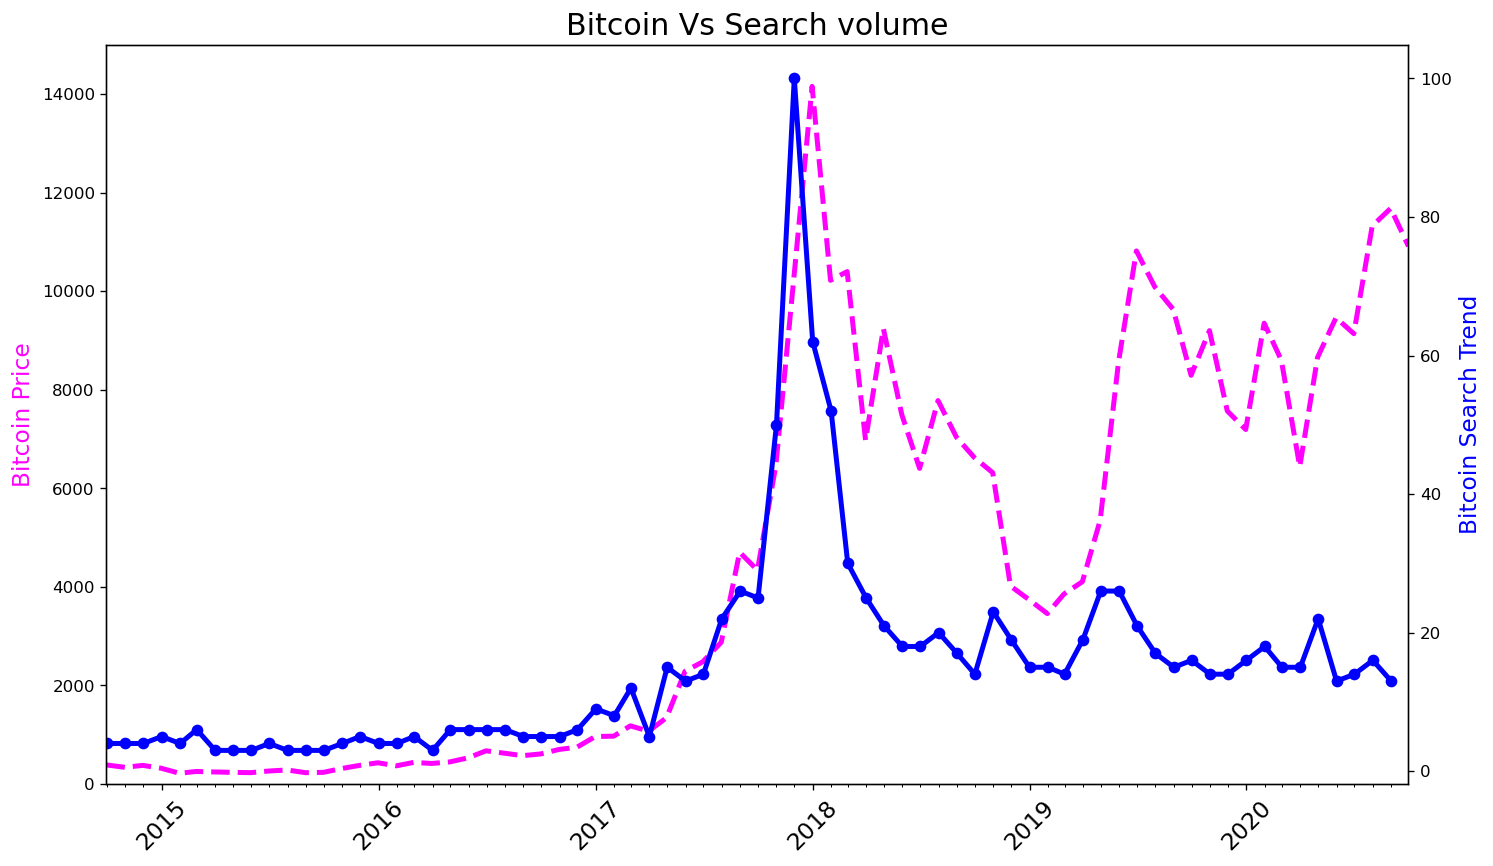

In [105]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin Vs Search volume', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Bitcoin Price', color='#FF00FF', fontsize=14)   
ax2.set_ylabel('Bitcoin Search Trend', color='blue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
 
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='#FF00FF', linewidth=3, linestyle='--')
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color='blue', linewidth=3, marker='o')
ax1.xaxis.set_major_locator(years)          # Set major ticks to years
ax1.xaxis.set_major_formatter(years_fmt)    # Format major ticks as years (e.g., 2023)
ax1.xaxis.set_minor_locator(months)          # Set minor ticks to months
plt.show()

**Notes on Line Styles and Markers**

- Matplotlib’s [linestyles](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) such as `'--'` (dashed) or `'-.'` (dash-dot) easily customize line appearance.
- Markers like `'o'` (circle), `'^'` (triangle), `'*'` (star), etc. are available for highlighting data points.
- Using color hex codes (e.g., `#F08F2E` for orange) helps match branding or thematic colors.

By plotting Bitcoin’s price with a dashed orange line and Google News search interest with blue circles, you can visually correlate surges in search activity with price movements.

**Insights**

- Huge Bitcoin price spikes around late 2017 to early 2018 coincide with extremely high search volumes, reflecting peak public interest.
- Notably, in Q1 2019, Bitcoin experienced a notable price jump without a corresponding spike in search frequency, suggesting a matured market or different public awareness levels.
  
---

## Unemployement Benefits Search vs. Actual Unemployment in the U.S.
### Unemployement 2019 data

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y> axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

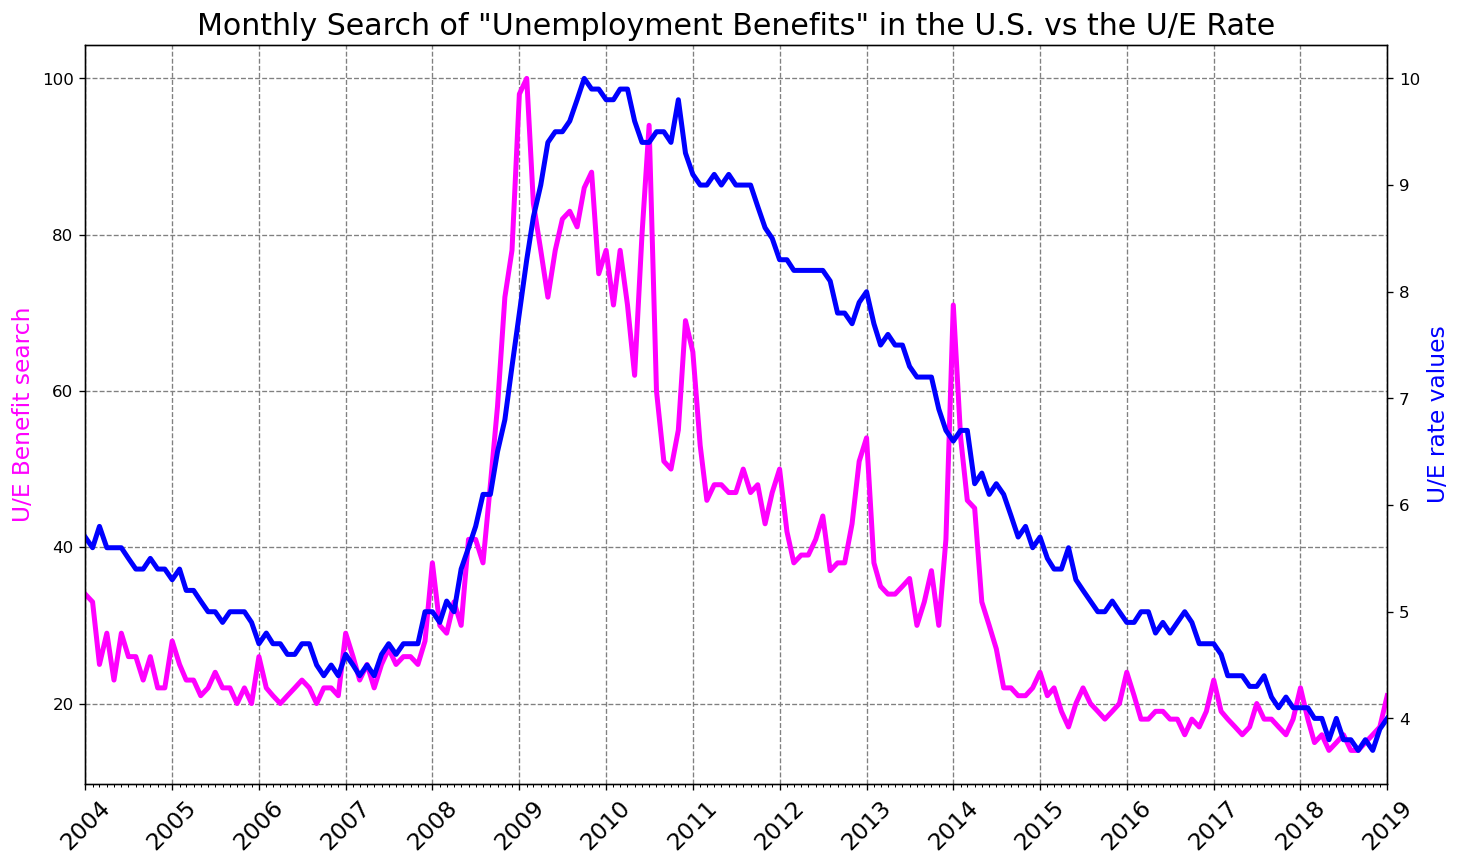

In [113]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('U/E Benefit search', color='#FF00FF', fontsize=14)   
ax2.set_ylabel('U/E rate values', color='blue', fontsize=14)
 
# Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
 
ax1.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='#FF00FF', linewidth=3)
ax2.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='blue', linewidth=3)
ax1.xaxis.set_major_locator(years)          # Set major ticks to years
ax1.xaxis.set_major_formatter(years_fmt)    # Format major ticks as years (e.g., 2023)
ax1.xaxis.set_minor_locator(months)          # Set minor ticks to months
ax1.grid(color='grey', linestyle='--')
plt.show()

**Insight**:
- By aligning the chart with vertical dashed lines and seasonal markers, it becomes much easier to identify patterns in the searches for "Unemployment benefits." Many search spikes line up with the end of the year—most notably in December—which highlights a clear **seasonality** in the job market.

- A major insight is visible around the **2007/2008 financial crisis**. During this period, there was a massive surge in both the U.S. unemployment rate and the volume of related searches. The recovery was slow: it took nearly a decade (from 2007 until around 2017) for the unemployment rate to return to its pre-crisis level.

- Another interesting observation is the **end-of-2013 spike** in Google searches for "Unemployment benefits," which was not matched by a corresponding increase in the official unemployment rate. This suggests that factors other than job losses—such as policy discussions, legislative changes, or news events—may have driven public interest and search behavior at that time.

These patterns help illustrate both expected trends (like seasonal spikes) and more surprising discrepancies, guiding further analysis into the events that trigger public concern about unemployment.

***

**Challenge**: Calculate the 3 month or 6 month rolling average for the web searches. Plot the 6> month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [124]:
# Lets do 6 months rolling average (Calculate the rolling average over a 6 month window)
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

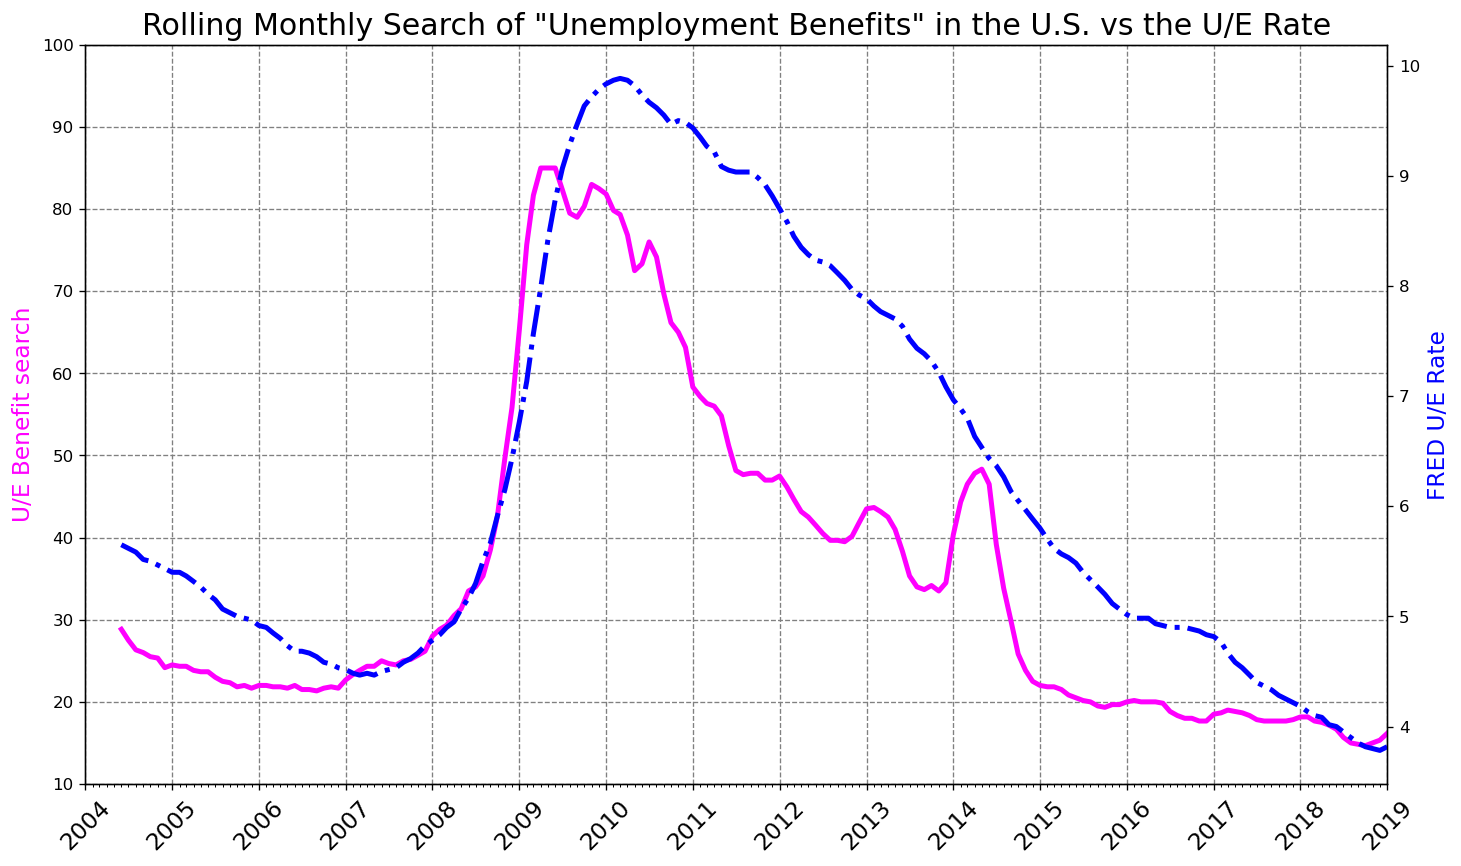

In [126]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('U/E Benefit search', color='#FF00FF', fontsize=14)   
ax2.set_ylabel('FRED U/E Rate', color='blue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([10, 100])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
 
ax1.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='#FF00FF', linewidth=3)
ax2.plot(df_unemployment.MONTH, roll_df.UNRATE, color='blue', linewidth=3, linestyle='-.')
ax1.xaxis.set_major_locator(years)          # Set major ticks to years
ax1.xaxis.set_major_formatter(years_fmt)    # Format major ticks as years (e.g., 2023)
ax1.xaxis.set_minor_locator(months)          # Set minor ticks to months
ax1.grid(color='grey', linestyle='--')
plt.show()

**Insights:**
We see that searches for "Unemployment Benefits" happen before the actual official unemployment rate goes up. Similarly, the search popularity for the term goes down before the unemployment rate decreases. In other words, these searches seem to act as a leading economic indicator for the unemployment rate (which is a lagging indicator).

### Including 2020 in Unemployment Charts - The Effect of New Data (2020)

To understand how the COVID-19 pandemic impacted U.S. unemployment, we add 2020 data to our analysis.

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004> 20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [127]:
df_unemployment_2020 = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-20.csv')

In [130]:
df_unemployment_2020.shape

(200, 3)

In [134]:
# Convert the `MONTH` column to Pandas datetime objects for proper time series handling.
df_unemployment_2020['MONTH'] = pd.to_datetime(df_unemployment_2020.MONTH)

In [135]:
df_unemployment_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


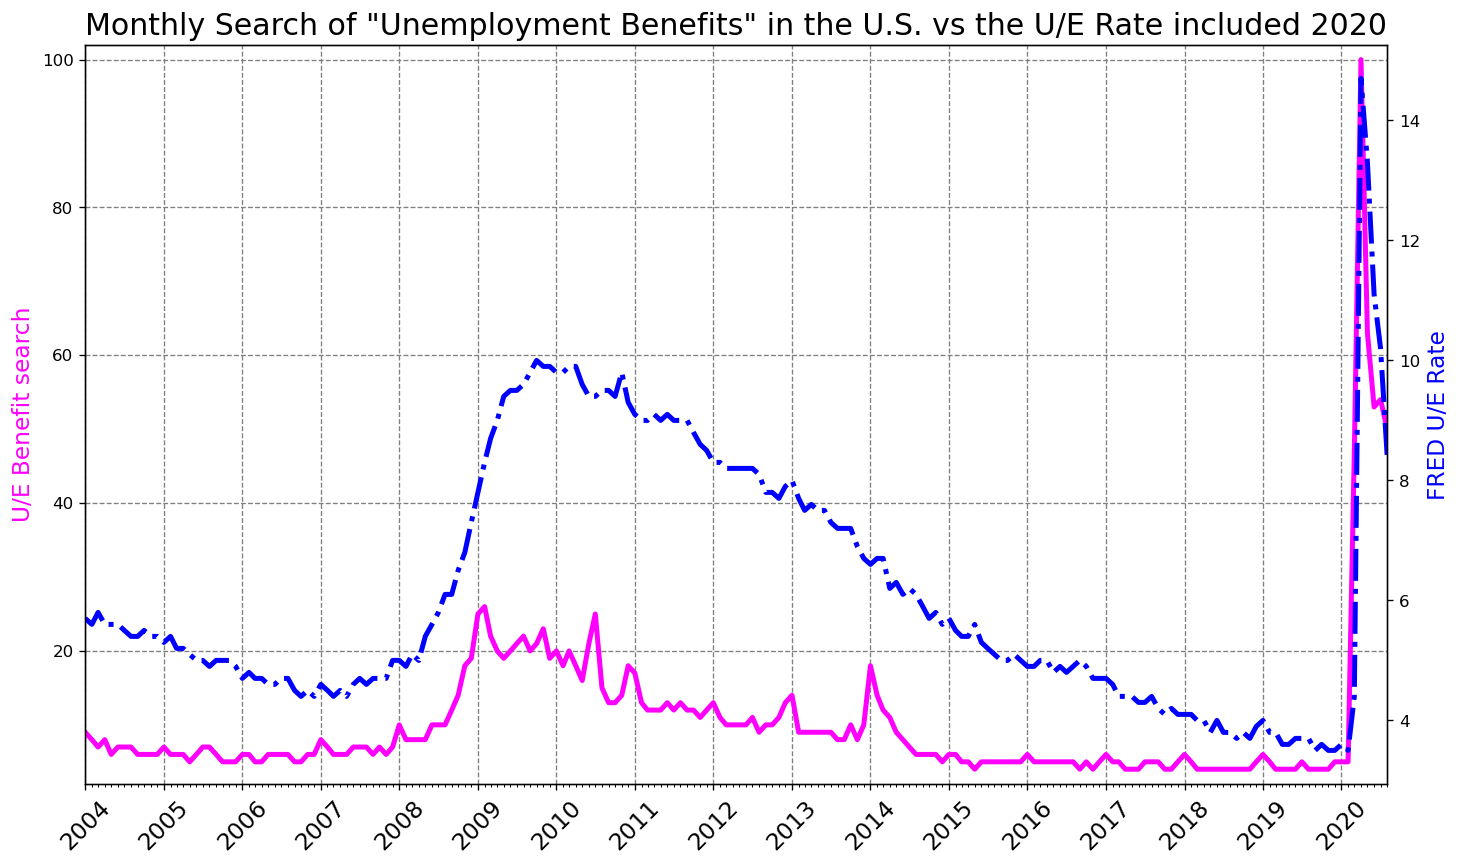

In [138]:
# Plot both the unemployment rate and web searches for "Unemployment Benefits" from 2004 through 2020.
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate included 2020', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('U/E Benefit search', color='#FF00FF', fontsize=14)   
ax2.set_ylabel('FRED U/E Rate', color='blue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([2, 102])
ax1.set_xlim([df_unemployment_2020.MONTH.min(), df_unemployment_2020.MONTH.max()])
 
ax1.plot(df_unemployment_2020.MONTH, df_unemployment_2020.UE_BENEFITS_WEB_SEARCH, color='#FF00FF', linewidth=3)
ax2.plot(df_unemployment_2020.MONTH, df_unemployment_2020.UNRATE, color='blue', linewidth=3, linestyle='-.')
ax1.xaxis.set_major_locator(years)          # Set major ticks to years
ax1.xaxis.set_major_formatter(years_fmt)    # Format major ticks as years (e.g., 2023)
ax1.xaxis.set_minor_locator(months)          # Set minor ticks to months
ax1.grid(color='grey', linestyle='--')
# plt.legend()
plt.show()

**What do we see?**

The results are dramatic. In 2020, the U.S. unemployment rate spiked to unprecedented levels-far higher than the peak during the 2008 financial crisis. This spike is mirrored by an enormous surge in search interest for "Unemployment Benefits," reflecting an overwhelming and sudden demand for assistance. The scale of the unemployment increase during the pandemic **dwarfs** all previous spikes in the dataset.

This chart starkly contrasts the 2008 financial crisis with the immediate and severe impact of COVID-19, showing how quickly the economy was affected and how rapid the public response was in seeking help. While the financial crisis took nearly a decade of slow recovery, the 2020 spike was abrupt and historic. The hope remains that the recovery from this crisis will be swifter than the last.